# Business Understanding

### a) Introduction

## Importing libraries

In [145]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

## Loading data

In [147]:
#loading gross data and previewing the first 5 rows
gross_df = pd.read_csv('CSV files/bom.movie_gross.csv',index_col=0)
gross_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [150]:
#loading basics data and previewing the first 5 rows
basics_df = pd.read_csv('CSV files/name.basics.csv', index_col=0)
basics_df.head()

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [151]:
#loading ratings data and previewing the first 5 rows
ratings_df = pd.read_csv('CSV files/title.ratings.csv', index_col=0)
ratings_df.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [159]:
#loading im datbase
#conn = sqlite3.connect('im.db')
#cur = conn.cursor()
#pd.read_sql

## Data analysis process

### 1. Understanding Data
   #### .selecting relevant columns to use 
   #### .Displaying information about the data 

In [96]:
#selecting relevant columns to use in gross
new_gross_df = gross_df[['title', 'domestic_gross']]
new_gross_df

,title,domestic_gross
0,Toy Story 3,415000000.0
1,Alice in Wonderland (2010),334200000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0
3,Inception,292600000.0
4,Shrek Forever After,238700000.0
...,...,...
3382,The Quake,6200.0
3383,Edward II (2018 re-release),4800.0
3384,El Pacto,2500.0
3385,The Swan,2400.0


In [94]:
#selecting relevant columns in basics
new_basics_df = basics_df[['primary_name', 'known_for_titles']]
new_basics_df

,primary_name,known_for_titles
0,Mary Ellen Bauder,"tt0837562,tt2398241,tt0844471,tt0118553"
1,Joseph Bauer,"tt0896534,tt6791238,tt0287072,tt1682940"
2,Bruce Baum,"tt1470654,tt0363631,tt0104030,tt0102898"
3,Axel Baumann,"tt0114371,tt2004304,tt1618448,tt1224387"
4,Pete Baxter,"tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...
606643,Susan Grobes,NaN
606644,Joo Yeon So,"tt9090932,tt8737130"
606645,Madeline Smith,"tt8734436,tt9615610"
606646,Michelle Modigliani,NaN


In [97]:
#selecting relevant columns in ratings
new_ratings_df = ratings_df[['tconst', 'averagerating']]
new_ratings_df

,tconst,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5
...,...,...
73851,tt9805820,8.1
73852,tt9844256,7.5
73853,tt9851050,4.7
73854,tt9886934,7.0


In [102]:
# displaying the columns and rows of gross
new_gross_df.shape

(3387, 2)

In [107]:
#info overview of gross data
new_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, 0 to 3386
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   domestic_gross  3359 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.7+ KB


In [152]:
#describing for descriptive statistics for gross data
new_gross_df.describe()

,domestic_gross
count,1.000000e+01
mean,6.342600e+08
std,1.283936e+08
min,4.863000e+08
25%,5.513000e+08
50%,6.218000e+08
75%,6.721750e+08
max,9.367000e+08


In [100]:
#checking rows and columns of basics data
new_basics_df.shape

(606648, 2)

In [108]:
new_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   primary_name      606648 non-null  object
 1   known_for_titles  576444 non-null  object
dtypes: object(2)
memory usage: 9.3+ MB


In [101]:
#new columns and rows of ratings
new_ratings_df.shape

(73856, 2)

In [109]:
new_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


## Filtering to relevant rows

In [120]:
#rows with missing data in domestic gross
new_gross_df = new_gross_df.dropna(subset=['domestic_gross', 'title'])
new_gross_df

,title,domestic_gross
0,Toy Story 3,415000000.0
1,Alice in Wonderland (2010),334200000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0
3,Inception,292600000.0
4,Shrek Forever After,238700000.0
...,...,...
3382,The Quake,6200.0
3383,Edward II (2018 re-release),4800.0
3384,El Pacto,2500.0
3385,The Swan,2400.0


In [124]:
# filtering rows with missing values in basics
new_basics_df = new_basics_df.dropna(subset=['primary_name', 'known_for_titles'])
new_basics_df

,primary_name,known_for_titles
0,Mary Ellen Bauder,"tt0837562,tt2398241,tt0844471,tt0118553"
1,Joseph Bauer,"tt0896534,tt6791238,tt0287072,tt1682940"
2,Bruce Baum,"tt1470654,tt0363631,tt0104030,tt0102898"
3,Axel Baumann,"tt0114371,tt2004304,tt1618448,tt1224387"
4,Pete Baxter,"tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...
606640,Layla Louise,"tt9910102,tt9898328,tt9335490,tt8894778"
606642,Fleurette Dicaire,tt8319420
606644,Joo Yeon So,"tt9090932,tt8737130"
606645,Madeline Smith,"tt8734436,tt9615610"


In [122]:
# filtering rows with missing values in ratings
new_ratings_df = new_ratings_df.dropna(subset=['tconst', 'averagerating'])
new_ratings_df

,tconst,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5
...,...,...
73851,tt9805820,8.1
73852,tt9844256,7.5
73853,tt9851050,4.7
73854,tt9886934,7.0


## sorting values

In [127]:
#sorting values in gross based on domestic gross
new_gross_df = new_gross_df.sort_values(by='domestic_gross', ascending=False)
new_gross_df.head(10)

,title,domestic_gross
1872,Star Wars: The Force Awakens,936700000.0
3080,Black Panther,700100000.0
3079,Avengers: Infinity War,678800000.0
1873,Jurassic World,652300000.0
727,Marvel's The Avengers,623400000.0
2758,Star Wars: The Last Jedi,620200000.0
3082,Incredibles 2,608600000.0
2323,Rogue One: A Star Wars Story,532200000.0
2759,Beauty and the Beast (2017),504000000.0
2324,Finding Dory,486300000.0


In [128]:
#sorting  values in ratings based on average rating 
new_ratings_df = new_ratings_df.sort_values(by='averagerating', ascending=False)
new_ratings_df.head(10)

,tconst,averagerating
27644,tt8730716,10.0
8992,tt1770682,10.0
26153,tt2632430,10.0
65033,tt9715646,10.0
57679,tt5344358,10.0
7017,tt6295832,10.0
56819,tt10378660,10.0
64754,tt7227500,10.0
6784,tt5390098,10.0
45335,tt6991826,10.0


In [130]:
#sorting  values in basics based on known for titles
new_basics_df = new_basics_df.sort_values(by='known_for_titles', ascending=False)
new_basics_df.head(10)

,primary_name,known_for_titles
420464,Meleisha Edwards,"tt9916764,tt4658330,tt8703832,tt8824956"
503593,Fábio Ferraz,"tt9916754,tt7378802,tt10231530,tt9916622"
473516,Ana Célia de Oliveira,"tt9916754,tt7378802,tt10011778,tt9916622"
21906,Odério Dias,"tt9916754,tt10225704,tt10169058,tt10006546"
563894,Vinicius Augusto Bozzo,"tt9916754,tt10118270,tt7378802,tt10163584"
598849,Daniel Cardoso,"tt9916754,tt10006546,tt10169058,tt9916622"
411760,Pranav Raorane,"tt9916730,tt3121604,tt8010920"
373158,Suvarna Kale,"tt9916706,tt10011164,tt8873348,tt8180580"
265814,Cristian Corradine,"tt9916680,tt3546376,tt0779984,tt2105062"
560306,Nilson Filho,"tt9916622,tt10017722,tt10225752,tt7378802"


In [136]:
#joining the three dataframes
top_domestic_gross = new_gross_df['domestic_gross'].value_counts().head(5).index.tolist()
top_domestic_gross

[936700000.0, 700100000.0, 678800000.0, 652300000.0, 623400000.0]

In [137]:
top_title = new_gross_df['title'].value_counts().head(5).index.tolist()
top_title

['Star Wars: The Force Awakens',
 'Black Panther',
 'Avengers: Infinity War',
 'Jurassic World',
 "Marvel's The Avengers"]

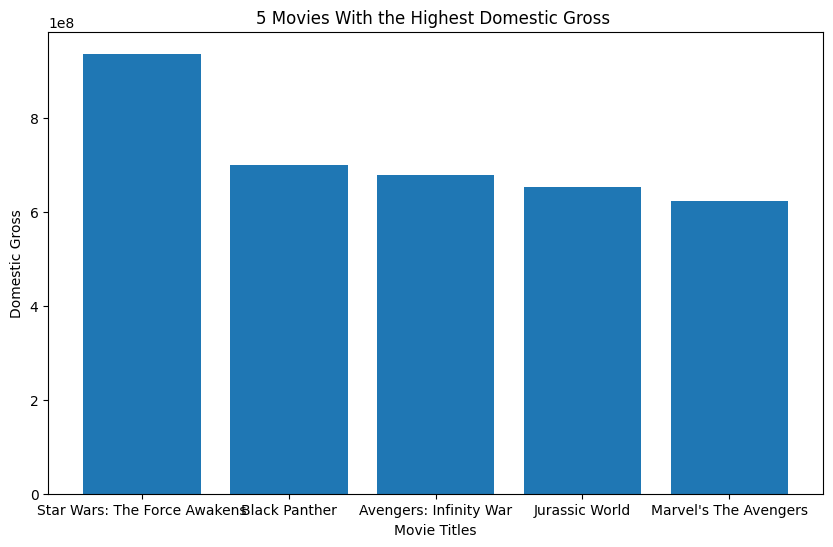

In [157]:
#plotting title vs domestic gross in gross csv
bar_chart_title = '5 Movies With the Highest Domestic Gross '
bar_chart_movie_label = 'Movie Titles'
bar_chart_count_label = 'Domestic Gross'

plot_movie_analysis, ax = plt.subplots(figsize =(10,6))

plt.bar(top_title, top_domestic_gross)

#adding title to labels
plt.title(bar_chart_title)
plt.xlabel(bar_chart_movie_label)
plt.ylabel(bar_chart_count_label)

plt.show()



In [158]:
#statistics summary
print("Descriptive statistics:")
print(data[['title', 'domestic_gross']].

SyntaxError: incomplete input (1049713443.py, line 3)

In [ ]:
#removing null values
new_gross_df = pd.DataFrame({'domestic_gross': 28})
new_gross_df = new_gross_df.dropna()
print(new_gross_df[new_gross_df.duplicated()])

In [ ]:
#final_gross_df.isnull().sum()

In [ ]:
#checking for duplicate
new_gross_df = pd.DataFrame()

In [ ]:
final_gross_df.head()